In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img_bgr = cv2.imread('dataset/3.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

target_bgr = cv2.imread('target.jpg')
target_rgb = cv2.cvtColor(target_bgr, cv2.COLOR_BGR2RGB)
target_gray = cv2.cvtColor(target_rgb, cv2.COLOR_RGB2GRAY)

In [3]:
# Detect keypoints using SIFT

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img_gray, None)
kp2, des2 = sift.detectAndCompute(target_gray, None)

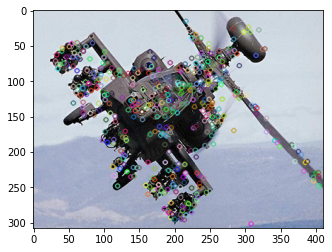

In [4]:
img_sift = img_rgb.copy()
img_sift = cv2.drawKeypoints(img_rgb, kp1, img_sift)

plt.imshow(img_sift)
plt.savefig('sift_keypoints.jpg')
plt.show()

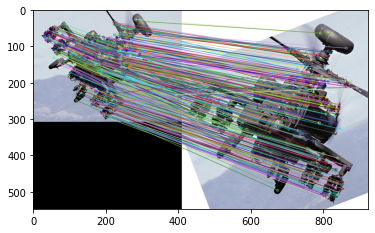

In [5]:
# Feature matching using Brute-Force Matcher

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
matches = cv2.drawMatchesKnn(img_rgb, kp1, target_rgb, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matches)
plt.savefig('sift_matches.jpg')
plt.show()